# Image Segmentation based on the HSV domain from RGB
This example came from [realpython.com](https://realpython.com/python-opencv-color-spaces/) originally with OpenCV. To make this a little more accessible to python users, we'll be using [skimage](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html) instead to make it a little more accessible and friendly for people who are familiar with Sci-kit learn and Numpy frameworks. 

I strongly suggest learning more on OpenCV if you're interested in Image Processing and Computer Vision techologies as it'll provide a number of enchanements if you have access to GPUs and supporting libraries like Cuda. We'll be using MatPlotLib and MatPlotLib's `mplot3d` to explore the different channels and 3D representations of images to better extract features we want to isolate in our preprocessing today!

This example is easy enough to work on and computer or binder notebook without a GPU. Enjoy and happy "finding nemo"!

In [81]:
#import skimage and numpy
import skimage
import numpy as np
from skimage import io


# Domain Transforms
from skimage.color import rgb2hsv, hsv2rgb

# Converting floats to bytes
from skimage.util import img_as_ubyte

# 3D plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Importing images with scikit learn
Since we have a local image we'll load that in `rgb_nemo.jpg` with the `skimage.io.imread` function.

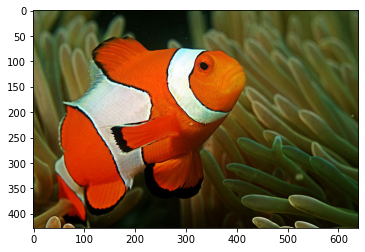

In [79]:
filename = './small-nemo.jpg'
nemo = skimage.io.imread(filename)

# lets view our cute image
plt.imshow(nemo)

# Lets view images in their HSV channels
At a glance, you'd be able to recognize that the orange in nemo is pretty vibrant in this picture. In the RGB domain and in this picture, it's fairly clear we could segment on that color alone. When we start to look at the rest of nemo, the white segments could be more tricky as they overlap with potentionally other background colors. 


We could look seperately at the RGB domains of the picture, but would find a similiar problem. The orange will stick out, but the color occourance of the white bands is just a little difficult to isolate. 


This is why we're going to look at this image in a different domain known as Hue, Saturation, and Value (HSV). These channels provide a different way to represent an image and allow us to isolate on these features through a different lense. Lets take a look at the indivual HSV channels and how they look compared to the RGB channels in a 2D and 3D view. 

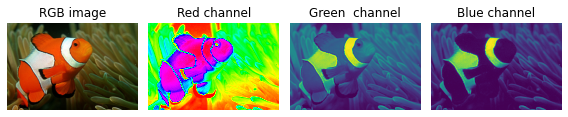

In [83]:
# lets see the RGB in 3D
r = nemo [:, :, 0]
g = nemo [:, :, 1]
b = nemo [:, :, 2]
#Plot indivual channels 
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 3))

ax0.imshow(nemo)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(r, cmap='hsv')
ax1.set_title("Red channel")
ax1.axis('off')
ax2.imshow(g)
ax2.set_title("Green  channel")
ax2.axis('off')
ax3.imshow(b)
ax3.set_title("Blue channel")
ax3.axis('off')

fig.tight_layout()

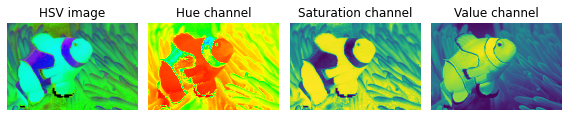

In [84]:
# now lets compare to the HSV channels
# break out the three chanels so we can see them indivually
hsv_img = rgb2hsv(nemo)

#were going to convert to uInt
hsv_img = img_as_ubyte(hsv_img)

# Break out our HSV Channels 
h = hsv_img[:, :, 0]
s = hsv_img[:, :, 1]
v = hsv_img[:, :, 2]

#Plot indivual channels 
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 3))

ax0.imshow(hsv_img)
ax0.set_title("HSV image")
ax0.axis('off')
ax1.imshow(h, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(s)
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(v)
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()

## 3D representations of RGB and HSV of our Nemo

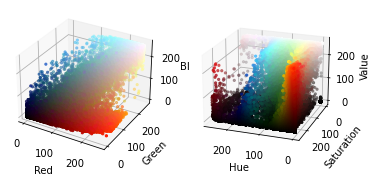

In [78]:


# Make the blank plot
fig3d = plt.figure()
axis3d = fig3d.add_subplot(1,2,1, projection="3d")

# add the pixel colors
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# add the axis
axis3d.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis3d.set_xlabel("Red")
axis3d.set_ylabel("Green")
axis3d.set_zlabel("Blue")
# plt.show()

# HSV 3D Plot
# Make the plot
# fig3d = plt.figure()
axis3d = fig3d.add_subplot(1,2,2, projection="3d")

# add the HSV 
axis3d.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")

# add the axis
axis3d.set_xlabel("Hue")
axis3d.set_ylabel("Saturation")
axis3d.set_zlabel("Value")

#rotate the graph a little to see the orange Values with saturation and hue
elev = 20
azim = 110
axis3d.view_init(elev,azim)

## Pulling out the bright orange spots
We're going to pull out the light orange segments. Looking at the 3D graph above, we want to pull out the light oranges and reds of Nemo. In the HSV mapping we can see a larger orange like region jutting out. 

If we look at our axises, we can see the following ranges we want to get: 

| Channel | Low End | High End |
|---|----|----|
| Hue| 1 | 40 | 
| Saturation | 170 | 255 |
| Value | 200 | 255 |


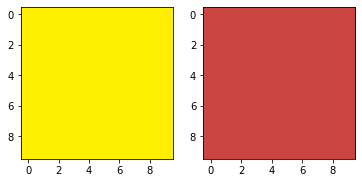

In [59]:
# Pull some Oranges from the HSV values
light_orange = [1, 170, 200]
dark_orange = [40, 255, 255]

#Make some colored Squares
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

# Lets see those colors
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))

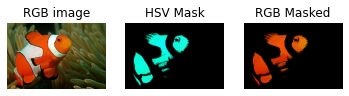

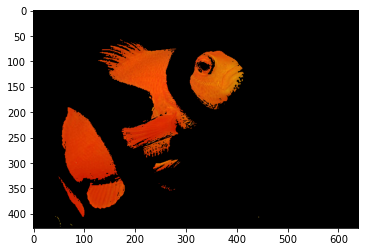

In [60]:
# Lets make some masks so we can see these colors in the image
# Mask for upper and lower bound colors we picked out

mask0 = (h < light_orange[0]) | (s < light_orange[1]) | (v < light_orange[2])
mask1 = (h > dark_orange[0]) | (s > dark_orange[1]) | (v > dark_orange[2])
orange_mask = mask0 + mask1

# were going to copy the hsv_img to this "masked" image in HSV and apply the masks
masked = hsv_img.copy()
masked[orange_mask] = 0

# Were going to convert back to the RGB color space and see how well we did
orange_maskedrgb = hsv2rgb(masked)

# Lets plot it again!
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(6, 2))
# f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(nemo)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(masked)
ax1.set_title("HSV Mask")
ax1.axis('off')
ax2.imshow(orange_maskedrgb)
ax2.set_title("RGB Masked")
ax2.axis('off')
plt.show()

# Upclo
plt.imshow(orange_maskedrgb)

## Lets get the white stripes of Nemo
We're going to pull out the white segments. Looking at the 3D graph above again, we want to pull out the light and darker whites of Nemo. In the HSV mapping we can see a larger band of white regions jutting across the top around the value band. 

If we look at our axises, we can see the following ranges we want to get: 

| Channel | Low End | High End |
|---|----|----|
| Hue| 0 | 145 | 
| Saturation | 0 | 60 |
| Value | 200 | 255 |


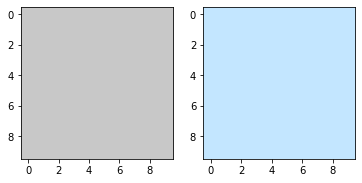

In [61]:
# masking the lighter colors
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

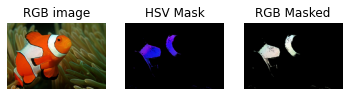

In [62]:
mask0 = (h < light_white[0]) | (s < light_white[1]) | (v < light_white[2])
mask1 = (h > dark_white[0]) | (s > dark_white[1]) | (v > dark_white[2])
# print(mask0)
white_mask = mask0+mask1
# were going to copy the hsv_img to this "masked" image in HSV and apply the masks
masked = hsv_img.copy()
masked[white_mask] = 0
white_maskedrgb = hsv2rgb(masked)

# Lets plot it again!
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(6, 2))
# f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(nemo)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(masked)
ax1.set_title("HSV Mask")
ax1.axis('off')
ax2.imshow(white_maskedrgb)
ax2.set_title("RGB Masked")
ax2.axis('off')
plt.show()


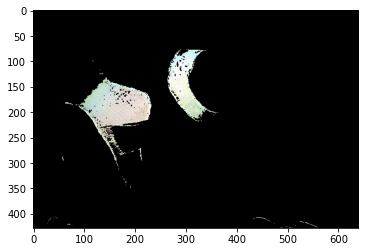

In [63]:
# Upclose with Nemo
plt.imshow(hsv2rgb(masked))

# Lets add our orange and white segmentations
We have our two segmentations of our friend nemo with the segmented orange and white channels. 

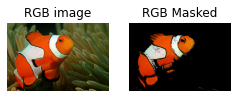

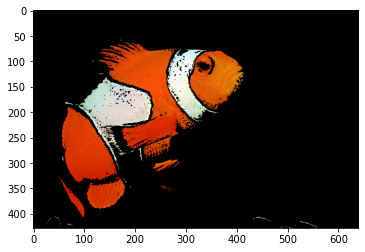

In [70]:
# Let's combine our images
final = orange_maskedrgb + white_maskedrgb

# and plot the endings!
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(4, 2))
ax0.imshow(nemo)
ax0.set_title("RGB image")
ax0.axis('off')

ax1.imshow(final)
ax1.set_title("RGB Masked")
ax1.axis('off')
plt.show()
plt.imshow(final)

# What other domains can I transform signals and images with? 


## Fourier Transforms: 
A great youtube video visualizing and explaining FTs can be found right here from [3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY). 

## Wavelet Transforms: 
A great youtuve video on wavelets explination can be found here from [Simon Xu](https://www.youtube.com/watch?v=ZnmvUCtUAEE)